In [1]:
#Changer le répertoire courant pour l'import des modules
import os

current_dir = os.getcwd()

target_dir = os.path.abspath(os.path.join(current_dir, '..', '..'))

os.chdir(target_dir)

In [2]:
from ApplicationsUNet.loadData import ThoraxDataLoader
import SimpleITK 
import skimage.io as io

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import Normalize

import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchsummary import summary
import torch.nn.functional as F

from matplotlib import cm
from matplotlib.colors import ListedColormap

In [3]:
loader = ThoraxDataLoader("./Data/Data_Medical/MCsimulations")
HS_dataset = loader.load_all_samples("HS")
newcmp = loader.newcmp

sample_0001 chargé avec succès.
sample_0002 chargé avec succès.
sample_0003 chargé avec succès.
sample_0004 chargé avec succès.
sample_0005 chargé avec succès.
sample_0006 chargé avec succès.
sample_0007 chargé avec succès.
sample_0008 chargé avec succès.
sample_0009 chargé avec succès.
sample_0010 chargé avec succès.
sample_0011 chargé avec succès.
sample_0012 chargé avec succès.
sample_0013 chargé avec succès.
sample_0014 chargé avec succès.
sample_0015 chargé avec succès.
sample_0016 chargé avec succès.
sample_0017 chargé avec succès.
sample_0018 chargé avec succès.
sample_0019 chargé avec succès.
sample_0020 chargé avec succès.
sample_0021 chargé avec succès.
sample_0022 chargé avec succès.
sample_0023 chargé avec succès.
sample_0024 chargé avec succès.
sample_0025 chargé avec succès.
sample_0026 chargé avec succès.
sample_0027 chargé avec succès.
sample_0028 chargé avec succès.
sample_0029 chargé avec succès.
sample_0030 chargé avec succès.
sample_0031 chargé avec succès.
sample_0

In [4]:
print(HS_dataset.shape)
print(type(HS_dataset[0,0,0]))

(6560, 64, 64)
<class 'numpy.float32'>


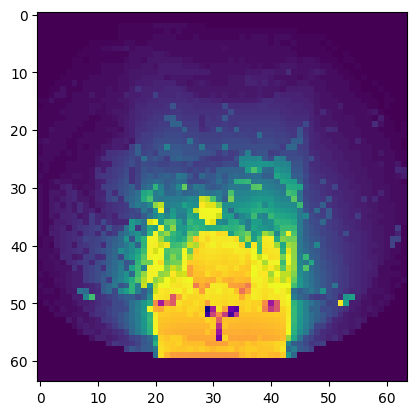

In [525]:
image=HS_dataset[11]
plt.imshow(image, interpolation=None, cmap=newcmp)
plt.show()

Visualisation de la distribution des intensités

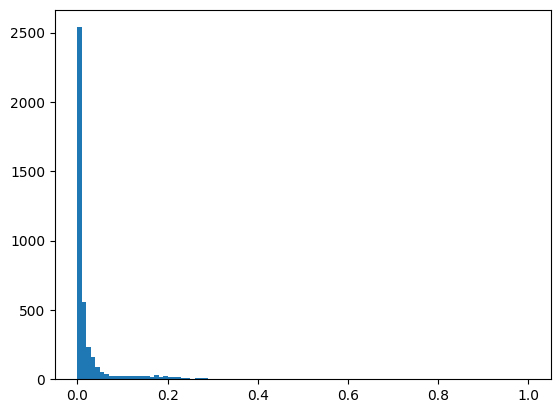

In [526]:
plt.hist(image.ravel(), bins=100 )
plt.show()

Redistribution des intensités

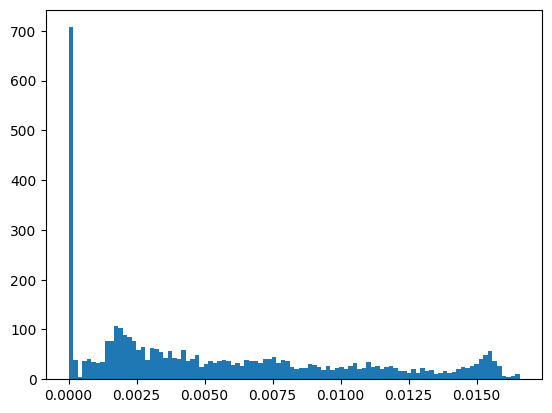

In [527]:
intensities = np.array([[i] for i in image.ravel()])
intensities_transformed = intensities
for i in range(120):
    intensities_transformed = np.log1p(intensities_transformed)
plt.hist(intensities_transformed.ravel(), bins= 100)
plt.show()

Préparation des features : l'intensité combinée aux coordonnées

In [530]:
from sklearn.preprocessing import StandardScaler
rows, cols = image.shape
x, y = np.meshgrid(np.arange(cols), np.arange(rows))
features = np.stack((np.array(intensities_transformed).ravel(), x.ravel(), y.ravel()), axis=1)
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)
intensity_weight = 10
features_normalized[:,0] *= intensity_weight

Application de KMeans

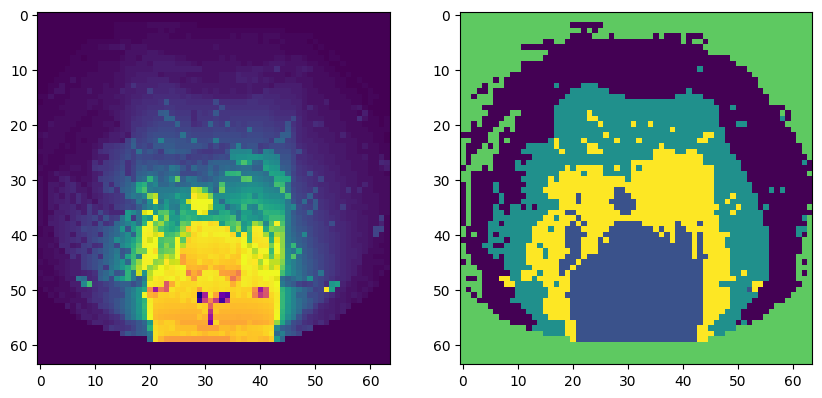

In [531]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(features_normalized)
segmented_image = kmeans.labels_.reshape(rows, cols)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, interpolation=None, cmap=newcmp)
axes[1].imshow(segmented_image, interpolation=None)
plt.show()